In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()     

In [2]:
all_df = pd.read_csv("spotify-2023.csv", encoding="latin-1")
all_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Explore the Data and do some pre-processing

In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
#look for NaN values
all_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
#drop NaN values
key_dropped = all_df.dropna(subset=['key'])
key_dropped.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        41
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
#Assume that the NaN values mean that the song is not in shazam charts
clean_df = key_dropped.copy()
clean_df['in_shazam_charts'] = pd.DataFrame(key_dropped['in_shazam_charts'].fillna(0))
clean_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Create Seperate Features for Artists

In [7]:
#seperate the artist names using str.split()
artist_df = clean_df["artist(s)_name"].str.split(',', expand=True)
artist_df

,0,1,2,3,4,5,6,7
0,Latto,Jung Kook,None,None,None,None,None,None
1,Myke Towers,None,None,None,None,None,None,None
2,Olivia Rodrigo,None,None,None,None,None,None,None
3,Taylor Swift,None,None,None,None,None,None,None
4,Bad Bunny,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
948,Selena Gomez,None,None,None,None,None,None,None
949,Taylor Swift,None,None,None,None,None,None,None
950,Feid,Paulo Londra,None,None,None,None,None,None
951,Feid,Sech,Jhayco,None,None,None,None,None


In [8]:
#Add new columns for first, second and third artists
clean_df["artist_1"] = artist_df[0]
clean_df["artist_2"] = artist_df[1]
clean_df["artist_3"] = artist_df[2]

#removing artist(s)_name column
clean_df = clean_df.drop("artist(s)_name", axis=1)

#move newly created columns to the front
clean_df.insert(1, 'artist_1', clean_df.pop('artist_1'))
clean_df.insert(2, 'artist_2', clean_df.pop('artist_2'))
clean_df.insert(3, 'artist_3', clean_df.pop('artist_3'))
clean_df

,track_name,artist_1,artist_2,artist_3,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,None,2,2023,7,14,553,147,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,None,None,1,2023,3,23,1474,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,None,None,1,2023,6,30,1397,113,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,None,None,1,2019,8,23,7858,100,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,None,None,1,2023,5,18,3133,50,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,None,None,1,2022,11,3,953,0,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,None,None,1,2022,10,21,1180,0,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),Feid,Paulo Londra,None,2,2022,11,3,573,0,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,Feid,Sech,Jhayco,3,2022,10,20,1320,0,...,97,C#,Major,82,67,77,8,0,12,5


In [9]:
clean_df.isnull().sum()

track_name                0
artist_1                  0
artist_2                527
artist_3                758
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts         0
streams                   0
in_apple_playlists        0
in_apple_charts           0
in_deezer_playlists       0
in_deezer_charts          0
in_shazam_charts          0
bpm                       0
key                       0
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
dtype: int64

Splitting the artist column results in more NaN values that have to be cleaned. Just replace the Nan with 'empty'

In [10]:
#replace all the NaN values in artist_1 and artist_2 with "empty"
cleaner_df = clean_df.copy()
cleaner_df['artist_2'] = pd.DataFrame(clean_df['artist_2'].fillna("empty"))

even_cleaner_df = cleaner_df.copy()
even_cleaner_df['artist_3'] = pd.DataFrame(cleaner_df['artist_3'].fillna("empty")) 
even_cleaner_df.isnull().sum()

track_name              0
artist_1                0
artist_2                0
artist_3                0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Feature Selection

In [11]:
dropped_df = even_cleaner_df.drop(['released_year', 'released_month', 'released_day', 'track_name', 'in_spotify_playlists',
                   'in_apple_playlists', 'in_deezer_playlists'
                  ], axis = 1)
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   artist_1            858 non-null    object
 1   artist_2            858 non-null    object
 2   artist_3            858 non-null    object
 3   artist_count        858 non-null    int64 
 4   in_spotify_charts   858 non-null    int64 
 5   streams             858 non-null    object
 6   in_apple_charts     858 non-null    int64 
 7   in_deezer_charts    858 non-null    int64 
 8   in_shazam_charts    858 non-null    object
 9   bpm                 858 non-null    int64 
 10  key                 858 non-null    object
 11  mode                858 non-null    object
 12  danceability_%      858 non-null    int64 
 13  valence_%           858 non-null    int64 
 14  energy_%            858 non-null    int64 
 15  acousticness_%      858 non-null    int64 
 16  instrumentalness_%  858 non-nul

### Fixing Data type for streams and in_shazam_charts

In [12]:
dropped_df['streams'] = pd.to_numeric(dropped_df['streams'], errors='coerce')

In [13]:
dropped_df.isna().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               1
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

One of the songs did not convert properly so we try doing it manually

In [14]:
all_df.iloc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

We find out that the data is messed up so we shall delete this row

In [15]:
df = dropped_df.dropna(subset=['streams'])
df.isnull().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               0
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_1            857 non-null    object 
 1   artist_2            857 non-null    object 
 2   artist_3            857 non-null    object 
 3   artist_count        857 non-null    int64  
 4   in_spotify_charts   857 non-null    int64  
 5   streams             857 non-null    float64
 6   in_apple_charts     857 non-null    int64  
 7   in_deezer_charts    857 non-null    int64  
 8   in_shazam_charts    857 non-null    object 
 9   bpm                 857 non-null    int64  
 10  key                 857 non-null    object 
 11  mode                857 non-null    object 
 12  danceability_%      857 non-null    int64  
 13  valence_%           857 non-null    int64  
 14  energy_%            857 non-null    int64  
 15  acousticness_%      857 non-null    int64  
 16  instrumentaln

For in_shazam_charts, the numbers have commas which cause them to be recognised as strings. Remove the commas.

In [17]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df.isnull().sum()

/tmp/ipykernel_27008/2242003826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
/tmp/ipykernel_27008/2242003826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')


artist_1               0
artist_2               0
artist_3               0
artist_count           0
in_spotify_charts      0
streams                0
in_apple_charts        0
in_deezer_charts       0
in_shazam_charts      41
bpm                    0
key                    0
mode                   0
danceability_%         0
valence_%              0
energy_%               0
acousticness_%         0
instrumentalness_%     0
liveness_%             0
speechiness_%          0
dtype: int64

Again, some of the in_shazam_charts data is empty. Again, we assume that these songs do not appear in the charts.

In [18]:
df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0)) 
df.isnull().sum()

/tmp/ipykernel_27008/1676298079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0))


artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               0
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [19]:
df = df.reset_index(drop=True)
df

,artist_1,artist_2,artist_3,artist_count,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Latto,Jung Kook,empty,2,147,141381703.0,263,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,Myke Towers,empty,empty,1,48,133716286.0,126,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,Olivia Rodrigo,empty,empty,1,113,140003974.0,207,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Taylor Swift,empty,empty,1,100,800840817.0,207,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,Bad Bunny,empty,empty,1,50,303236322.0,133,15,425.0,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Selena Gomez,empty,empty,1,0,91473363.0,13,1,0.0,144,A,Major,60,24,39,57,0,8,3
853,Taylor Swift,empty,empty,1,0,121871870.0,0,0,0.0,166,F#,Major,42,7,24,83,1,12,6
854,Feid,Paulo Londra,empty,2,0,73513683.0,0,0,0.0,92,C#,Major,80,81,67,4,0,8,6
855,Feid,Sech,Jhayco,3,0,133895612.0,26,0,0.0,97,C#,Major,82,67,77,8,0,12,5


### Creating new feature for whether songs appear in apple, spotify and shazam top 100 charts

In [20]:
df['spotify_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_spotify_charts']))
df['deezer_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_deezer_charts']))
df['apple_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_apple_charts']))
df['shazam_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_shazam_charts']))
df

,artist_1,artist_2,artist_3,artist_count,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,spotify_top_100,deezer_top_100,apple_top_100,shazam_top_100
0,Latto,Jung Kook,empty,2,147,141381703.0,263,10,826.0,125,...,89,83,31,0,8,4,0,1,0,0
1,Myke Towers,empty,empty,1,48,133716286.0,126,14,382.0,92,...,61,74,7,0,10,4,1,1,0,0
2,Olivia Rodrigo,empty,empty,1,113,140003974.0,207,14,949.0,138,...,32,53,17,0,31,6,0,1,0,0
3,Taylor Swift,empty,empty,1,100,800840817.0,207,12,548.0,170,...,58,72,11,0,11,15,1,1,0,0
4,Bad Bunny,empty,empty,1,50,303236322.0,133,15,425.0,144,...,23,80,14,63,11,6,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Selena Gomez,empty,empty,1,0,91473363.0,13,1,0.0,144,...,24,39,57,0,8,3,0,1,1,0
853,Taylor Swift,empty,empty,1,0,121871870.0,0,0,0.0,166,...,7,24,83,1,12,6,0,0,0,0
854,Feid,Paulo Londra,empty,2,0,73513683.0,0,0,0.0,92,...,81,67,4,0,8,6,0,0,0,0
855,Feid,Sech,Jhayco,3,0,133895612.0,26,0,0.0,97,...,67,77,8,0,12,5,0,0,1,0


In [21]:
#remove 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'
df = df.drop(['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'], axis=1)

### One-Hot Encoding Categorical Variables

variables to encode are artist names, key and mode

In [22]:
#import one-hot encoder and initialise it
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [23]:
#extract the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['artist_1', 'artist_2', 'artist_3', 'key', 'mode']

In [24]:
#perform the one-hot encoding
ohe = encoder.fit_transform(df[['artist_1', 'artist_2', 'artist_3', 'key', 'mode']])
encoded_df = pd.DataFrame(ohe, columns = encoder.get_feature_names_out(['artist_1', 'artist_2', 'artist_3', 'key', 'mode']))

In [25]:
encoded_df

,artist_1_(G)I-DLE,artist_1_21 Savage,artist_1_24kgoldn,artist_1_50 Cent,artist_1_A$AP Rocky,artist_1_Abhijay Sharma,artist_1_Adele,artist_1_Aerosmith,artist_1_Agust D,artist_1_Aitana,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
#join the encoded variables dataframe with our main dataframe
combined_df = pd.concat([df, encoded_df], axis=1)

In [27]:
#check for NaN values
combined_df.isnull().values.any()

False

In [28]:
#drop artist, key and mode columns
combined_df = combined_df.drop(['artist_1', 'artist_2', 'artist_3', 'key', 'mode'], axis='columns')

### Scaling

In [29]:
#import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
#Initialse the scaler
scaler = MinMaxScaler()

In [30]:
#scaling the data using StandardScaler from sklearn 
scaled_df = pd.DataFrame(scaler.fit_transform(combined_df), columns = list(combined_df))
scaled_df

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.142857,0.038170,0.425532,0.780822,0.913978,0.831325,0.319588,0.000000,0.053191,0.032258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.036101,0.191489,0.657534,0.612903,0.722892,0.072165,0.000000,0.074468,0.032258,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.037798,0.517730,0.383562,0.301075,0.469880,0.175258,0.000000,0.297872,0.064516,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.216215,0.744681,0.438356,0.580645,0.698795,0.113402,0.000000,0.085106,0.209677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.081869,0.560284,0.575342,0.204301,0.795181,0.144330,0.692308,0.085106,0.064516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.000000,0.024696,0.560284,0.506849,0.215054,0.301205,0.587629,0.000000,0.053191,0.016129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.000000,0.032903,0.716312,0.260274,0.032258,0.120482,0.855670,0.010989,0.095745,0.064516,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.142857,0.019847,0.191489,0.780822,0.827957,0.638554,0.041237,0.000000,0.053191,0.064516,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.285714,0.036149,0.226950,0.808219,0.677419,0.759036,0.082474,0.000000,0.095745,0.048387,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Pre-processing is done. Now Explore the Data Further

In [31]:
#create numerical dataframe
numerical_columns = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'speechiness_%', 'liveness_%',
                    'instrumentalness_%']
numerical_df = df[numerical_columns]

#create categorical dataframe
categoricals = df.select_dtypes(include=['object']).columns.tolist()
categorical_df = df[categoricals]
extras = pd.DataFrame(df[['artist_count','apple_top_100', 'deezer_top_100', 'shazam_top_100',
                        'spotify_top_100']])
categorical_df = pd.concat([categorical_df, extras], axis=1)

In [32]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   streams             857 non-null    float64
 1   bpm                 857 non-null    int64  
 2   danceability_%      857 non-null    int64  
 3   valence_%           857 non-null    int64  
 4   energy_%            857 non-null    int64  
 5   acousticness_%      857 non-null    int64  
 6   speechiness_%       857 non-null    int64  
 7   liveness_%          857 non-null    int64  
 8   instrumentalness_%  857 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 60.4 KB


In [33]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist_1         857 non-null    object
 1   artist_2         857 non-null    object
 2   artist_3         857 non-null    object
 3   key              857 non-null    object
 4   mode             857 non-null    object
 5   artist_count     857 non-null    int64 
 6   apple_top_100    857 non-null    int64 
 7   deezer_top_100   857 non-null    int64 
 8   shazam_top_100   857 non-null    int64 
 9   spotify_top_100  857 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 67.1+ KB


<Axes: xlabel='mode', ylabel='count'>

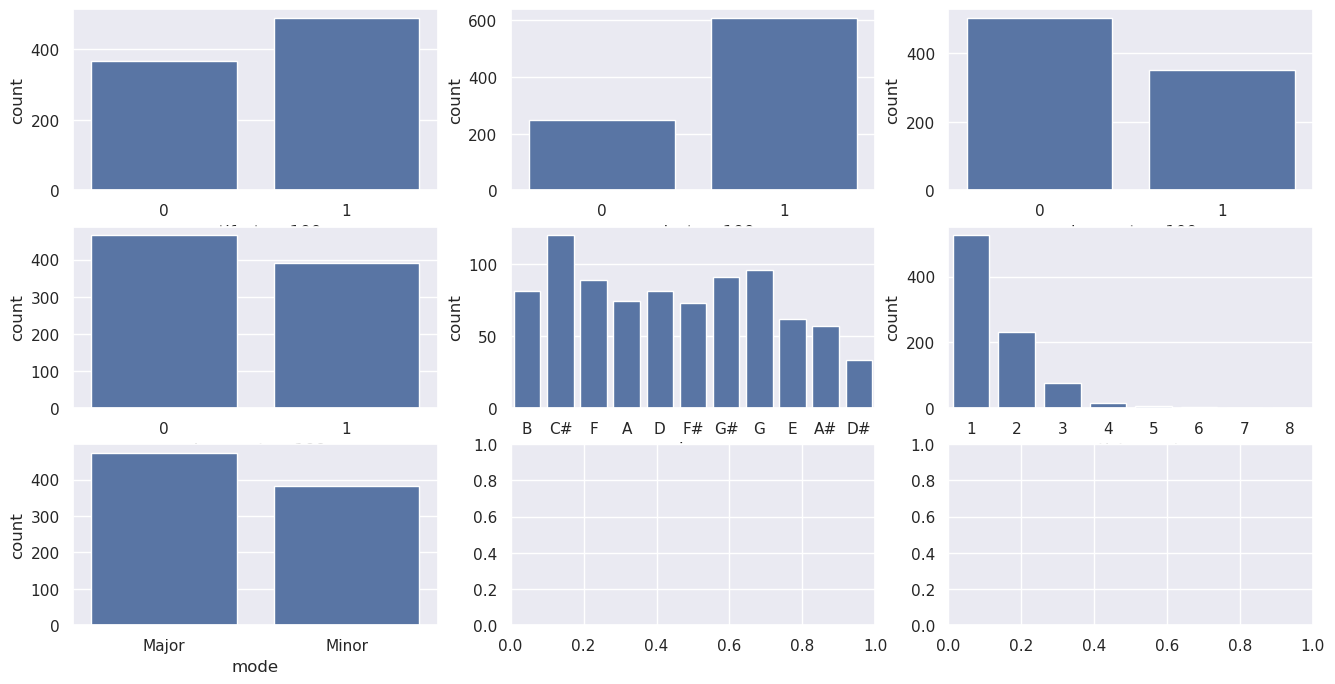

In [34]:
#plot categorical variables
fig, axes = plt.subplots(3, 3, figsize=(16,8))

sb.countplot(data=df, x='spotify_top_100', ax=axes[0,0])
sb.countplot(data=df, x='apple_top_100', ax=axes[0,1])
sb.countplot(data=df, x='deezer_top_100', ax=axes[0,2])
sb.countplot(data=df, x='shazam_top_100', ax=axes[1,0])
sb.countplot(data=df, x='key', ax=axes[1,1])
sb.countplot(data=df, x='artist_count', ax=axes[1,2])
sb.countplot(data=df, x='mode', ax=axes[2,0])


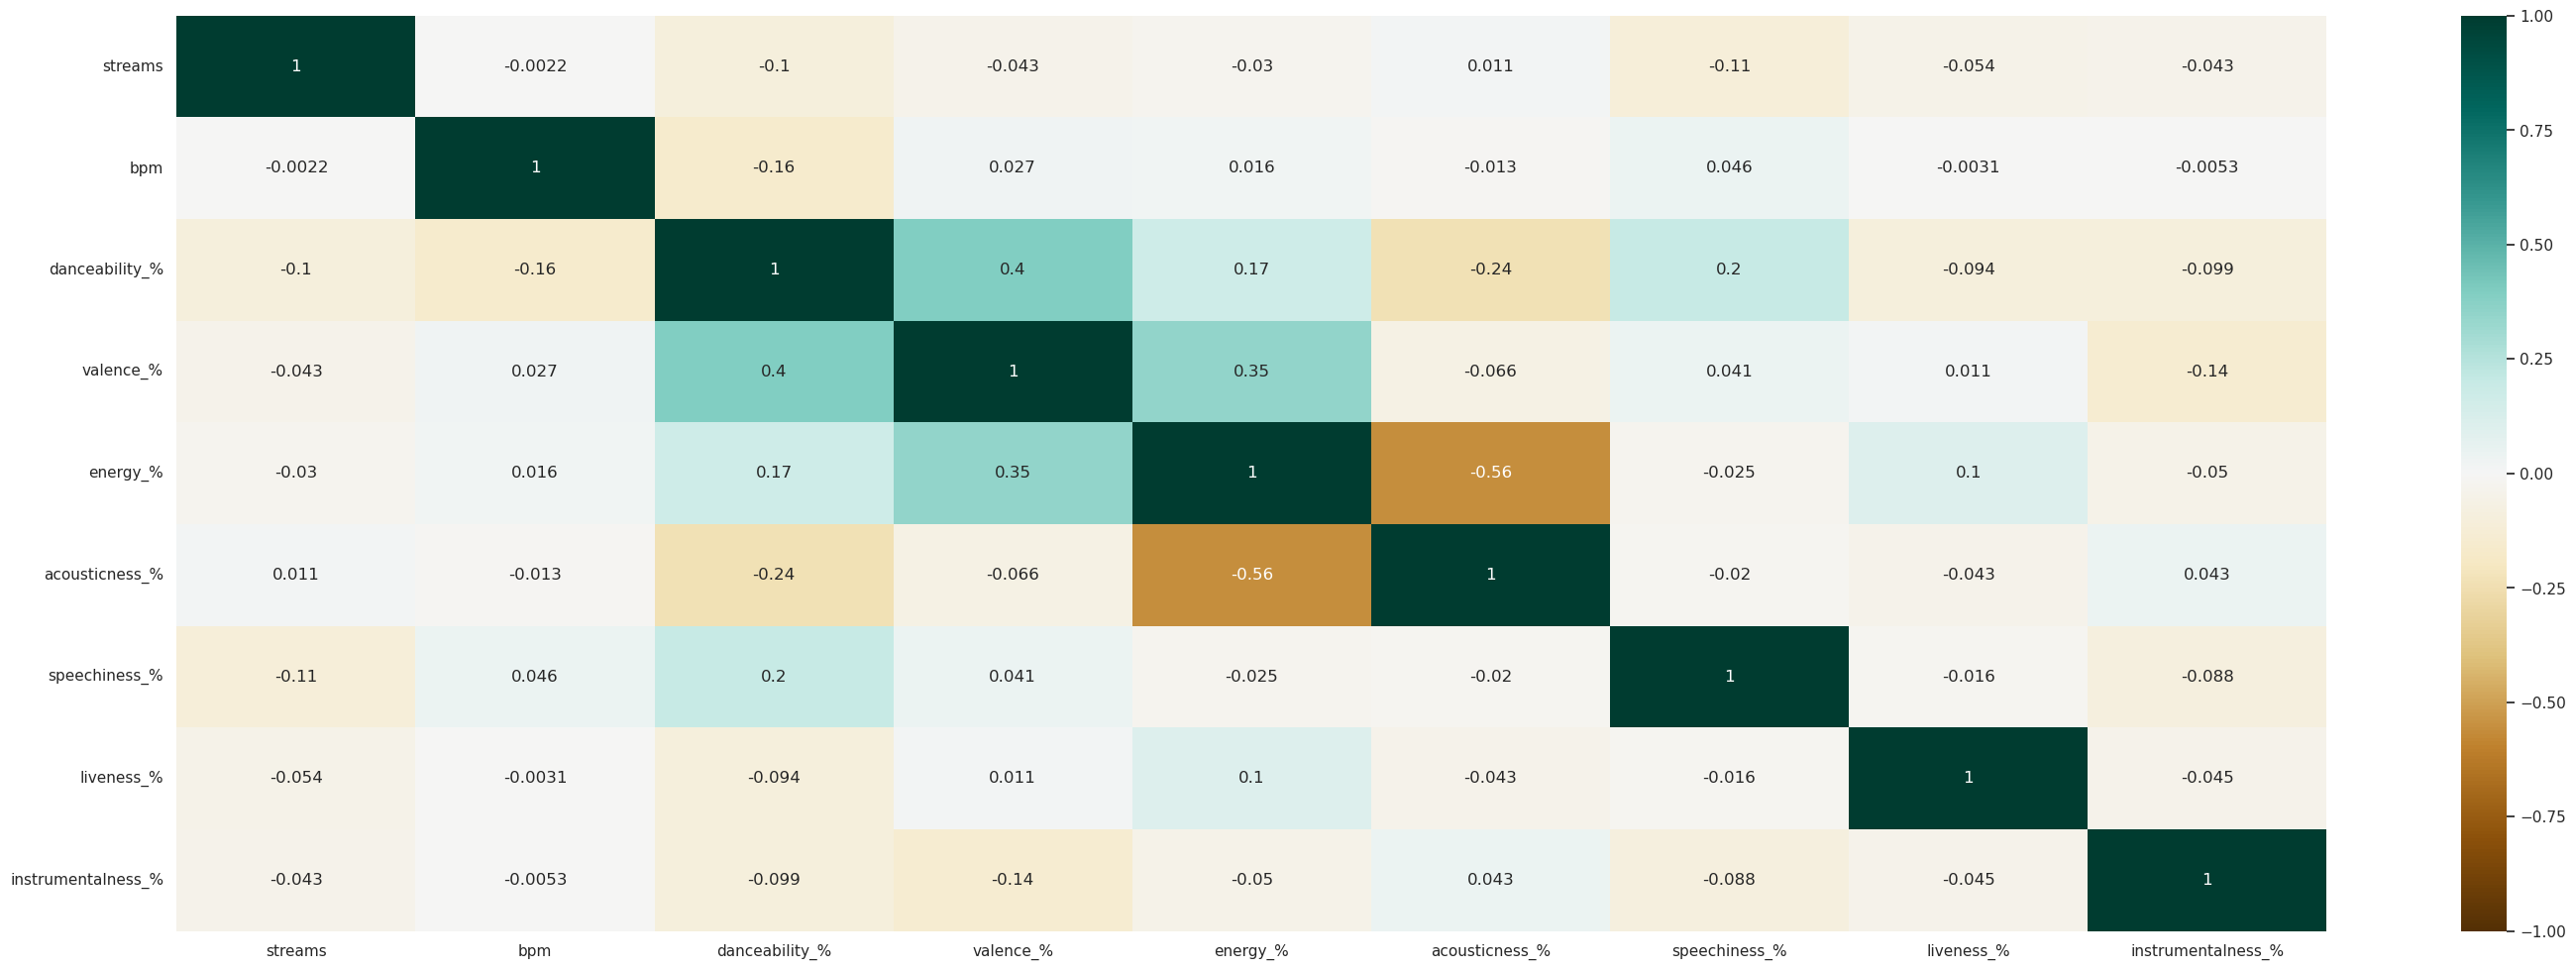

In [35]:
plt.figure(figsize=(35, 12))
heatmap = sb.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

<Axes: xlabel='key', ylabel='Percent'>

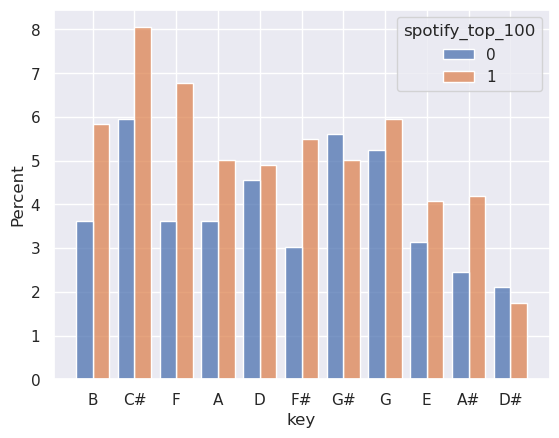

In [36]:
sb.histplot(data=categorical_df, x='key', hue='spotify_top_100', multiple='dodge', shrink=.8, stat='percent')

<Axes: xlabel='mode', ylabel='Percent'>

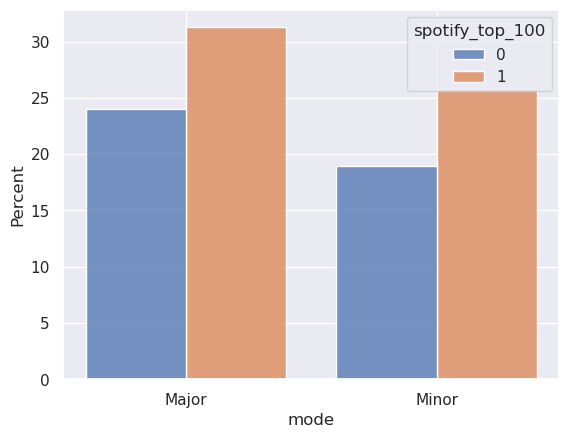

In [37]:
sb.histplot(data=categorical_df, x='mode', hue='spotify_top_100', multiple='dodge', shrink=.8, stat='percent')

# GUYS PLEASE ADD MORE EDA IDK HOW TO DO EDA

### Prepare Dataset for Modelling

We will remove the apple, deezer and shazam charts columns when training the model

Afterwards, we will predict the spotify charts for the test set and then use the same model to predict apple, shazam and deezer charts

In [38]:
spotify_df = scaled_df.drop(['apple_top_100', 'shazam_top_100', 'deezer_top_100'], axis=1)

In [39]:
spotify_df.drop(['streams'], axis=1)

,artist_count,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,spotify_top_100,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.142857,0.425532,0.780822,0.913978,0.831325,0.319588,0.000000,0.053191,0.032258,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.191489,0.657534,0.612903,0.722892,0.072165,0.000000,0.074468,0.032258,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.517730,0.383562,0.301075,0.469880,0.175258,0.000000,0.297872,0.064516,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.744681,0.438356,0.580645,0.698795,0.113402,0.000000,0.085106,0.209677,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.560284,0.575342,0.204301,0.795181,0.144330,0.692308,0.085106,0.064516,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.000000,0.560284,0.506849,0.215054,0.301205,0.587629,0.000000,0.053191,0.016129,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.000000,0.716312,0.260274,0.032258,0.120482,0.855670,0.010989,0.095745,0.064516,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.142857,0.191489,0.780822,0.827957,0.638554,0.041237,0.000000,0.053191,0.064516,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.285714,0.226950,0.808219,0.677419,0.759036,0.082474,0.000000,0.095745,0.048387,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Split the Dataset

In [57]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

x = spotify_df.drop(['spotify_top_100'], axis=1)
y = pd.DataFrame(spotify_df['spotify_top_100'])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=1)

In [60]:
X_train.shape

(642, 768)

In [61]:
y_train.shape

(642, 1)

In [62]:
X_test.shape

(215, 768)

In [63]:
y_test.shape

(215, 1)

# Modelling

In [85]:
from tensorflow import keras
from tensorflow.keras import layers

In [86]:
#include a callback for ealy stopping whch stops the fitting if the improvement in loss is minimal
#This reduces the chance of overfitting 
early_stop = keras.callbacks.EarlyStopping(min_delta = 0.001,
                                          patience = 10,
                                          restore_best_weights = True)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
#output layer uses sigmoid activation function which can return probability

/home/tinkybala/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
#defining optimisation algortihm and loss function. Note that cross-entropy is chosen instead of MSE or RSS because I scaled the data to 0-1.
#If I were to use RSS, the gradient to descent will be very slow!
model.compile(
    optimizer='SGD',
    loss= 'binary_crossentropy',
    metrics= ['binary_accuracy']
)

In [88]:
predict = model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    batch_size = 64,
    epochs = 175,
    callbacks = [early_stop],
)

Epoch 1/175
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.4080 - loss: 0.7019 - val_binary_accuracy: 0.4651 - val_loss: 0.6951
Epoch 2/175
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.4603 - loss: 0.6963 - val_binary_accuracy: 0.5535 - val_loss: 0.6918
Epoch 3/175
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.4875 - loss: 0.6943 - val_binary_accuracy: 0.5628 - val_loss: 0.6903
Epoch 4/175
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.5214 - loss: 0.6915 - val_binary_accuracy: 0.5302 - val_loss: 0.6885
Epoch 5/175
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.6067 - loss: 0.6865 - val_binary_accuracy: 0.5674 - val_loss: 0.6872
Epoch 6/175
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.5995 - loss: 0.6852 - val_binary_accuracy: 0.5581 - val_loss: 0.6865
Epoch 7/175
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.5915 - loss: 0.6832 - val_binary_accuracy: 0.5535 - val_loss: 0.6857
Epoch 8/17

<Axes: >

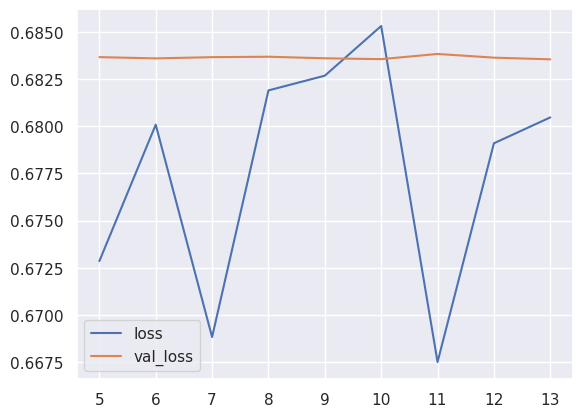

In [84]:
history_df = pd.DataFrame(predict.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()

<Axes: >

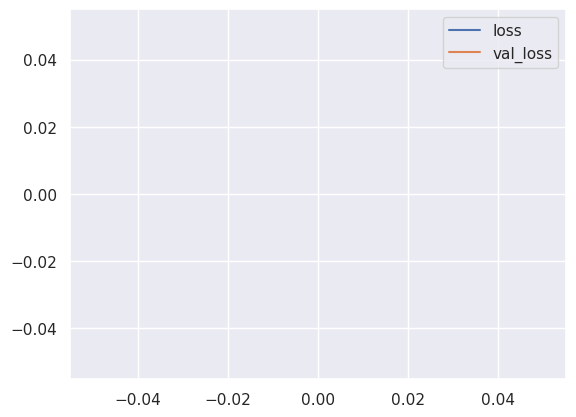

In [51]:
history_df.loc[100:, ['loss', 'val_loss']].plot()

In [52]:
print(f"Best Test Loss: {history_df['val_loss'].min(): .5f}")
print(f"Best Test Accuracy: {history_df['val_binary_accuracy'].max(): .5f}")

Best Test Loss:  0.68478
Best Test Accuracy:  0.57209


# one more thing to add is gridsearchcv for hyperparameter tuning

### Let's try the model again but for apple music and other streaming services